# Newton's Forward Difference Interpolation

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def NewtonFD(xData,yData,x):
    '''Newton's Forward Difference Interpolation
       Parameters:
           xData, yData: Data points
           x: Interpolating point
       Return:
           interpolant: An array of y values of interpolant evaluated at x '''

    N = len(xData)
    p = 1
    h = xData[1]-xData[0]
    u = (x-xData[0])/h
    sum = yData[0]
    f = np.zeros((N,N))

    for j in range(0,N):
        f[0][j] = yData[j]
    for i in range(1,N):
        for j in range(0,N-i):
            f[i][j]=f[i-1][j+1]-f[i-1][j]
    for i in range(1,N):
        p = p*((u-i+1)/i)
        sum = sum + p*f[i][0]

    return sum

Example run: Interpolating data points (Equally spaced in X-coordinate)

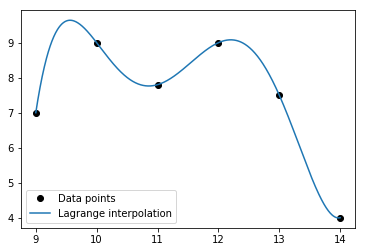

In [7]:
xData = np.array([9, 10, 11, 12, 13, 14])
yData = np.array([7, 9, 7.8, 9, 7.5, 4])

xInter = np.linspace(xData[0],xData[-1],1000)
yInter = NewtonFD(xData,yData,xInter)

plt.figure(1)
plt.plot(xData,yData,'ko',label='Data points')
plt.plot(xInter,yInter,label='Lagrange interpolation')
plt.legend()
plt.show()

Example run: Interpolating sampling points from a function

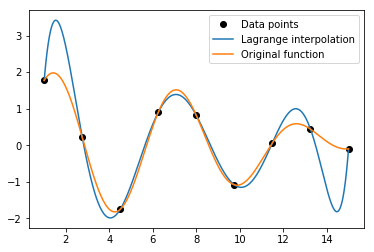

In [8]:
def f(x):
    return np.sin(x) + np.sin(1.2 * x)

xData = np.linspace(1,15,9)
yData = f(xData)

xInter = np.linspace(xData[0],xData[-1],1000)
yInter = NewtonFD(xData,yData,xInter)

plt.figure(2)
plt.plot(xData,yData,'ko',label='Data points')
plt.plot(xInter,yInter,label='Lagrange interpolation')
plt.plot(xInter,f(xInter),label='Original function')
plt.legend()
plt.show()